# End-to-end Machine Learning Project
Chapter 2

_Pg 33_

### Function to fetch the data
_Pg 44_

In [1]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data()

### Load data using Pandas

In [2]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [3]:
housing = load_housing_data()
housing.head()
# housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Explore dataset (a bit)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


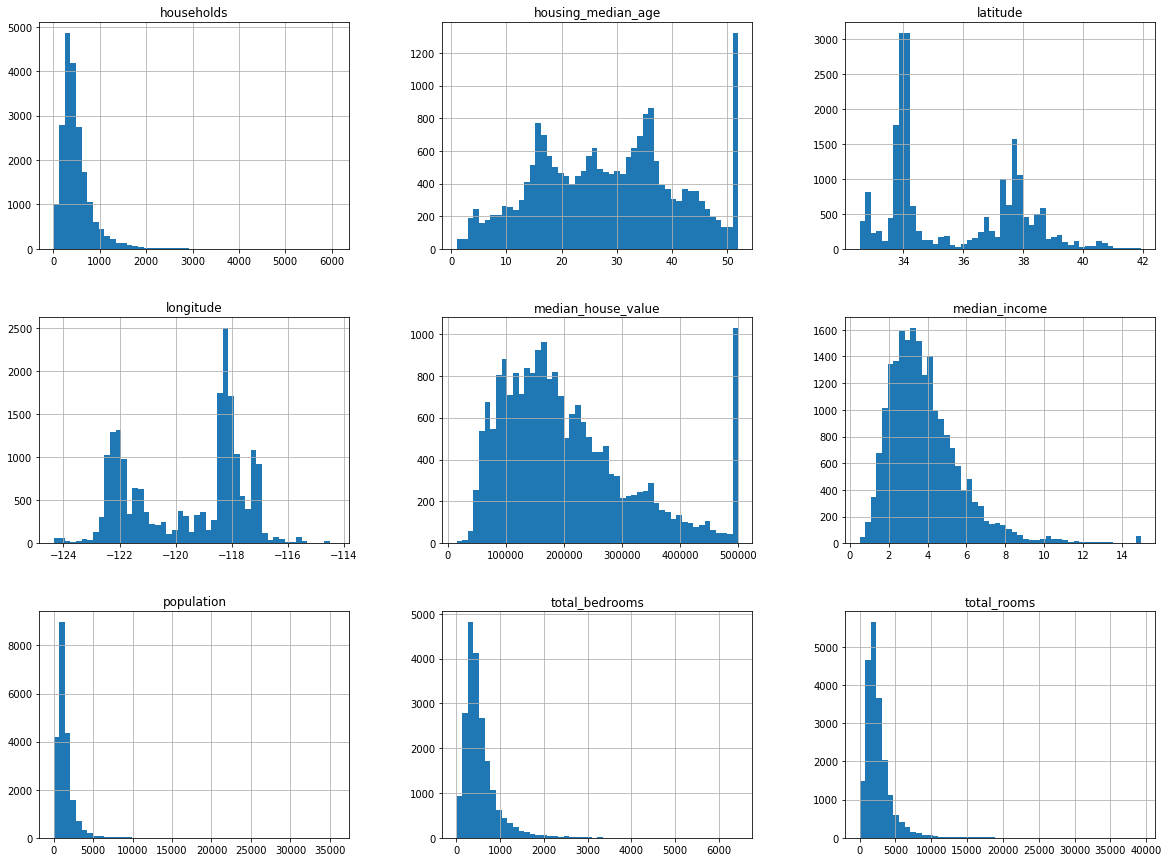

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

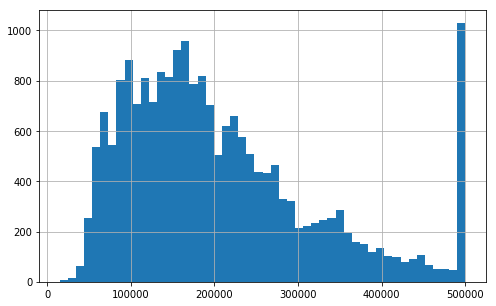

In [8]:
housing['median_house_value'].hist(bins=50, figsize=(8,5))
plt.show()

### Locate points (ArcGIS)

In [ ]:
from arcgis.gis import GIS
my_gis = GIS()
# my_gis.map()

In [ ]:
housingloc = housing[['longitude', 'latitude']]

In [ ]:
housingloc.head()

In [ ]:
housingloc[1000:2000].tail(5)

In [ ]:
housingmap = my_gis.content.import_data(housingloc[1000:2000])

In [ ]:
map1 = my_gis.map('California')

In [ ]:
map1.add_layer(housingmap)

In [ ]:
map1

### Locate points (Matplotlib)

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

x = housing['longitude']
y = housing['latitude']

plt.figure(figsize=(8,8))
plt.plot(x, y, 'ro')
plt.axis('scaled')
plt.draw()

### Locate points (Folium)
https://python-visualization.github.io/folium/

In [ ]:
lomin = housing['longitude'].min()
lomax = housing['longitude'].max()
lamin = housing['latitude'].min()
lamax = housing['latitude'].max()
print(lomin, lomax, lamin, lamax)

In [ ]:
import folium

In [ ]:
m = folium.Map(
#     location=[45.372, -121.6972],
#     bounds = [(32.54, -124.35), (41.95, -114.31)],
#     zoom_start=5,
#     tiles='OpenStreetMap'
    tiles='Stamen Toner',
#     tiles='Stamen Terrain'
#     tiles = 'Stamen Watercolor'
#     tiles = 'Mapbox Bright'
#     tiles = 'Mapbox Control Room'
#     tiles = 'CartoDB positron'
#     tiles = 'CartoDB dark_matter'
    width='50%', height='50%',
)

In [ ]:
m.fit_bounds([(lamin, lomin), (lamax, lomax)])

In [ ]:
listofpoints = [[row['latitude'], row['longitude']] for index, row in housing[:2000].iterrows()]

In [ ]:
listofpoints

In [ ]:
for p in listofpoints:
    folium.Circle(location=p, radius=5, color='crimson', fill=True, fill_color='crimson').add_to(m)

In [ ]:
for p in listofpoints:
    folium.Marker([p[0], p[1]]).add_to(m)

In [ ]:
m

### Locate points (Geopandas)

In [ ]:
import geopandas

In [ ]:
cali = geopandas.read_file('datasets/shapefiles/California/GU_StateOrTerritory.shp')

In [ ]:
cali.head()

In [ ]:
cali.plot()

In [ ]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

plt.plot(x, y, 'ro')
cali.plot(ax=ax, color='#1f77b4', edgecolor='#bbbbbb')

plt.show()

### Create a Test Set
_Pg 49_

In [9]:
import numpy as np
# to make this notebook's output identical at every run
np.random.seed(42)

##### Split the train test

In [10]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = split_train_test(housing, 0.2)

In [12]:
print('Train set: {} instances. Test set: {} instances.'.format(len(train_set), len(test_set)))

Train set: 16512 instances. Test set: 4128 instances.


In [13]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [14]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


##### To ensure the train test will remain consistent across multiple runs

In [15]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

##### Create an identifier column

In [16]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

In [17]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

##### Using Scikit-learn  to split the train set

In [18]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

### Creating Income categories
_Pg 52_

Median Income is a continuous numerical attribute - we need to create categories

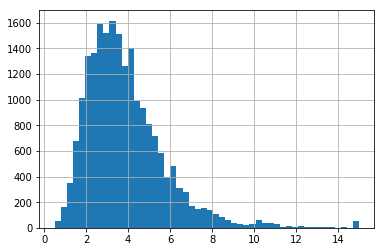

In [21]:
%matplotlib inline
# housing['median_income'].hist()
housing['median_income'].hist(bins=50)

In [22]:
# creating income categories
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

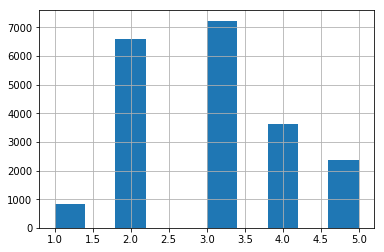

In [23]:
housing["income_cat"].hist()

In [26]:
housing[["income_cat"]].head()

,income_cat
0,5.0
1,5.0
2,5.0
3,4.0
4,3.0


##### Stratified sampling based on Income category

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [30]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5.0
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4.0
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3.0
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3.0
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3.0


##### Income categories proportions in the test dataset:

In [32]:
# strat_test_set["income_cat"].value_counts()
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

##### Income categories proportions in the whole dataset:

In [34]:
# housing["income_cat"].value_counts()
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

##### Remove the Income category so the data is back to its original state

In [35]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### Discover and Visualize the Data
_Pg 53_

Make sure to put the test set aside and only work with the **training set**. Create a copy of it to play without harming the training set.

In [36]:
housing = strat_train_set.copy()

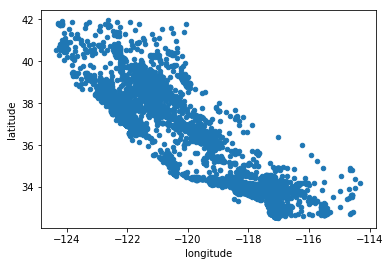

In [37]:
housing.plot(kind="scatter", x="longitude", y="latitude")

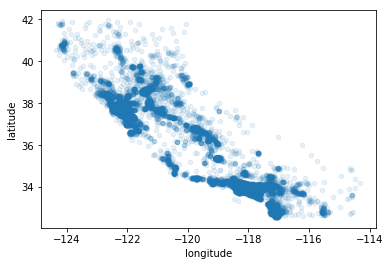

In [38]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

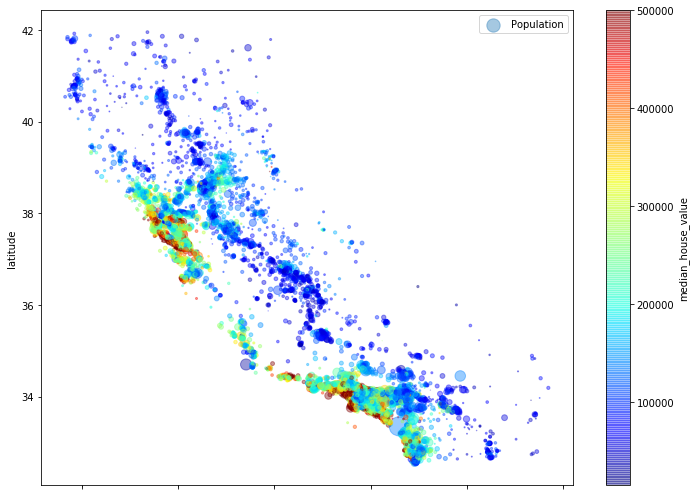

In [43]:
# s:size = population, c:colour = price
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="Population", figsize=(10, 7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()
plt.tight_layout()

### Looking for Correlations
_Pg  56_

Standard Correlation Coefficient : Pearson's **r**

In [44]:
corr_matrix = housing.corr()

In [46]:
# corr_matrix["median_house_value"]
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64